# t-SNE using MNIST

In [1]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import offsetbox
from sklearn import manifold, datasets
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

#%matplotlib inline
%matplotlib notebook

Automatically created module for IPython interactive environment


First, we explore t-SNE using a simplified version of MNIST (8x8 instead of 28x28 pixels)

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape

(1797, 64)

Project the data above to 2D space 

In [3]:
tsne_2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
tic = time()
X_tsne_2d = tsne_2d.fit_transform(X)
toc = time()
print('Time taken:'+str(toc-tic)+' sec')

Time taken:16.187674045562744 sec


Plot the resulting transformation

<IPython.core.display.Javascript object>


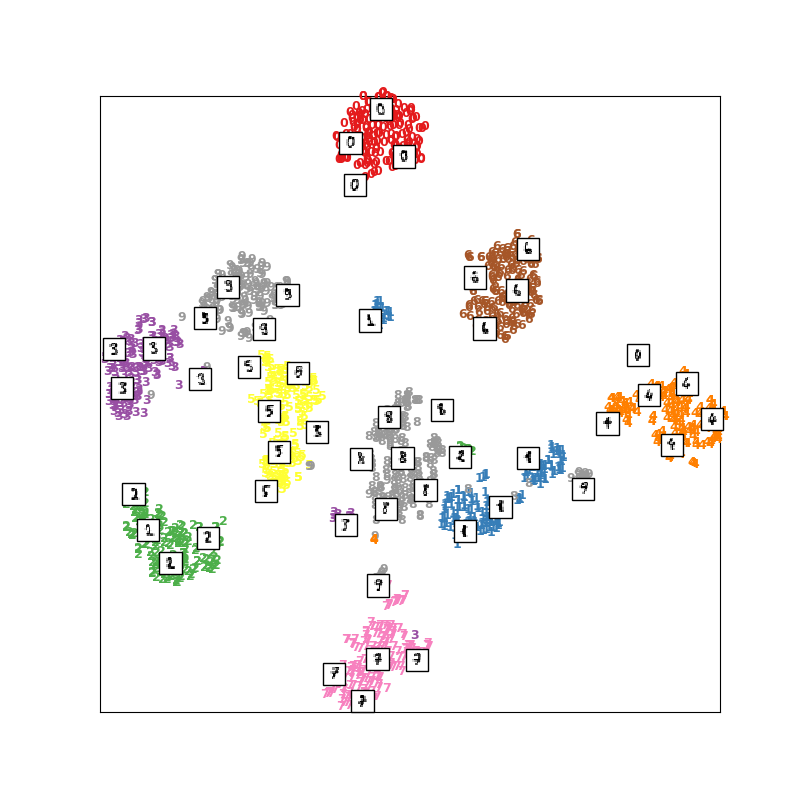

In [4]:
# Modified from the following example: 
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1((y[i]+1) / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

plot_embedding(X_tsne_2d)

plt.show()

Repeat with 3D

Time taken:43.24676179885864 sec


<IPython.core.display.Javascript object>


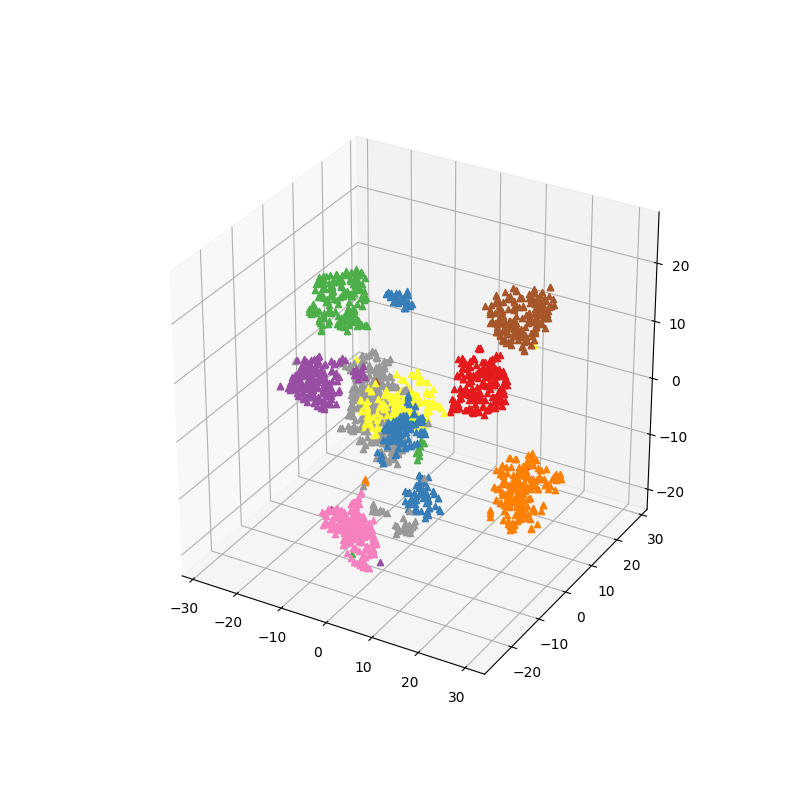

In [5]:
tsne_3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
tic = time()
X_tsne_3d = tsne_3d.fit_transform(X)
toc = time()
print('Time taken:'+str(toc-tic)+' sec')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
           
    ax.scatter(X_tsne_3d[i,0],X_tsne_3d[i,1],X_tsne_3d[i,2], 
               color=plt.cm.Set1((y[i] +1)/ 10.), marker='^');

Let's now use the original MNIST data. We shuffle the data and just use 10% of the data (to save computational time)

In [6]:
mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255.0, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
print(X_train.shape, y_train.shape)

(7000, 784) (7000,)


In [7]:
tsne_2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
tic = time()
X_tsne_2d = tsne_2d.fit_transform(X_train)
toc = time()
print('Time taken:'+str(toc-tic)+' sec')

Time taken:124.4619550704956 sec


Having scatterplot legends with only unique labels can be a bit tricky in matplotlib. This is the solution I like best

<IPython.core.display.Javascript object>


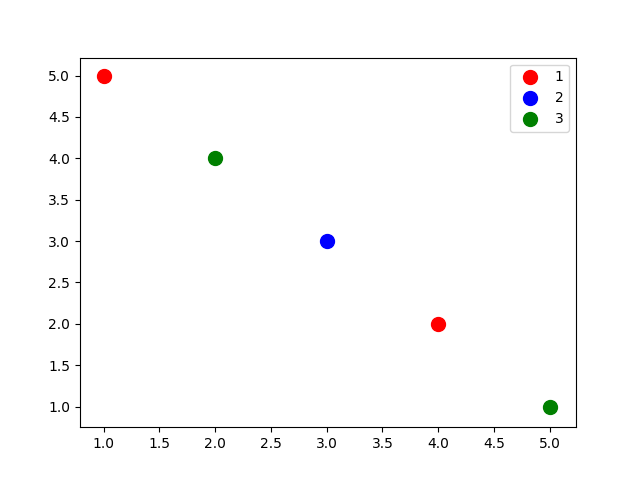

In [8]:
# the best solution to stop repeating same labels in the legend
# http://stackoverflow.com.mevn.net/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

scatter_x=np.array([1,2,3,4,5])
scatter_y=np.array([5,4,3,2,1])
group=np.array([1,3,2,1,3])

cdict={1: 'red', 2: 'blue', 3: 'green'}
fig, ax=plt.subplots()
for g in np.unique(group):
    ix=np.where(group==g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cdict[g], label=g, s=100)
ax.legend()
plt.show()

We use the above method to plot our MNIST 2D embedding using Tableu colour scheme

<IPython.core.display.Javascript object>


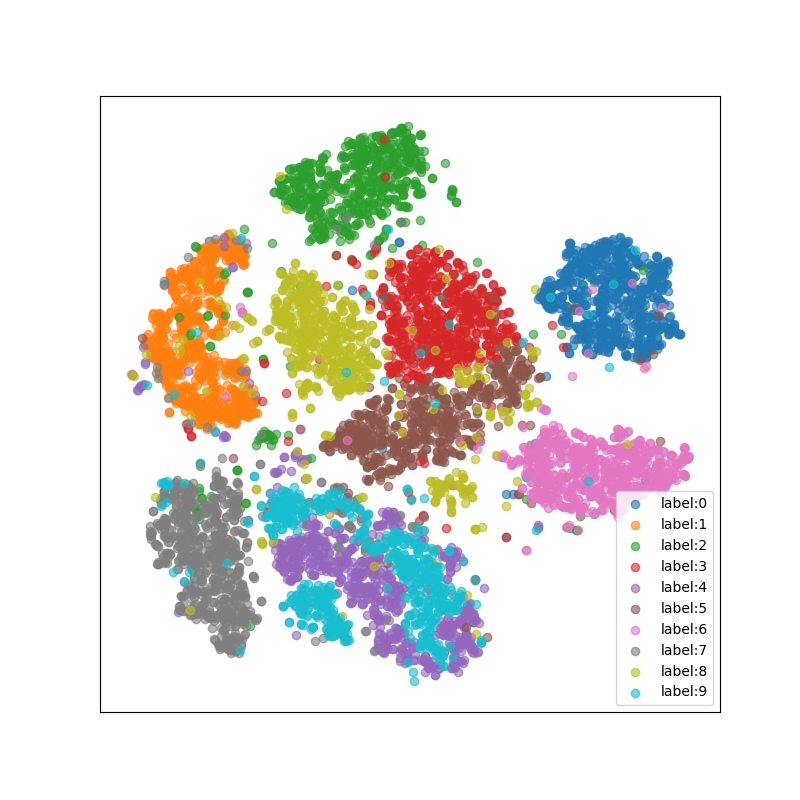

In [9]:
scatter_x=np.array(X_tsne_2d[:, 0])
scatter_y=np.array(X_tsne_2d[:, 1])
group=np.array(y_train)

cdict={0: 'tab:blue', 1: 'tab:orange', 2: 'tab:green', 3: 'tab:red', 4: 'tab:purple', 
           5: 'tab:brown', 6: 'tab:pink', 7: 'tab:gray', 8: 'tab:olive', 9: 'tab:cyan'}

plt.figure(figsize=(8,8))
ax = plt.subplot(111)
for g in np.unique(group):
    ix=np.where(group==g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cdict[g], label='label:'+str(int(g)), alpha=0.6)
ax.legend()
plt.xticks([]), plt.yticks([])
plt.show()